<PIL.Image.Image image mode=RGB size=150x150 at 0x1042C518630>
(150, 150, 3)
(1, 150, 150, 3)


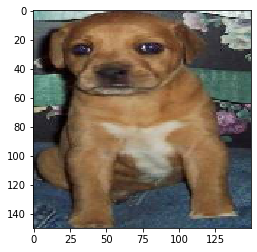

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [2]:
######################################################################
#이미지 전처리
#######################################################################
img_path = 'dog.1507.jpg'
# 이미지를 4D 텐서로 변경
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))  # 150, 150 픽셀로 크기 조절하여 load
print(img )
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용합니다
print(img_tensor.shape)  # 이미지 텐서의 크기는 (1, 150, 150, 3)입니다

import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(img_tensor[0])
plt.show()
#######################################################################

from keras import layers
from keras import models
from keras import optimizers

def makeModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    print(model.summary())

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['accuracy'])
    return model

#######################################################################
model =  makeModel() 
model.load_weights("k_model.h5")

result = model.predict(img_tensor)
print(result)

if result < 0.5:
    print('고양이')
else:
    print('강아지')